In [0]:
#

możemy sprawdzić czy ilość filmików dla każdego kanału daje rozkład normalny
to samo z wyświetleniami dla każdego kanału
i osobno dla filmików


Dodać analize zależności wyśwwietleń i lajków od kategorii

policzyć wskaźniki normalizacji, testy chi^2
może jakiś model przewidujący

# Youtube video data analysis

Importing libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from pandas import read_csv
import scipy.stats as scp

In [0]:
from scipy.stats import shapiro
import seaborn as sns
from scipy import stats


Uploading dataset

In [0]:
from google.colab import files
uploaded = files.upload()

Saving USvideos.csv to USvideos.csv


In [0]:
videos = read_csv("USvideos.csv")

Podstawowe informacje o zbiorze danych

In [0]:
videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [0]:
videos.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [0]:
videos.title

0                       WE WANT TO TALK ABOUT OUR MARRIAGE
1        The Trump Presidency: Last Week Tonight with J...
2        Racist Superman | Rudy Mancuso, King Bach & Le...
3                         Nickelback Lyrics: Real or Fake?
4                                 I Dare You: GOING BALD!?
5                                    2 Weeks with iPhone X
6                Roy Moore & Jeff Sessions Cold Open - SNL
7                      5 Ice Cream Gadgets put to the Test
8        The Greatest Showman | Official Trailer 2 [HD]...
9        Why the rise of the robots won’t mean the end ...
10       Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...
11       (SPOILERS) 'Shiva Saves the Day' Talked About ...
12              Marshmello - Blocks (Official Music Video)
13                  Which Countries Are About To Collapse?
14                                SHOPPING FOR NEW FISH!!!
15                                        The New SpotMini
16        One Change That Would Make Pacific Rim a Class

In [0]:
videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [0]:
first_5000 = videos[1:5000]
first_5000.shape

(4999, 16)

In [0]:
stat, p = shapiro(videos.views)
stat2, p2 = stats.normaltest(videos.views)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [0]:
print("shapiro test p: " + str(p))
print("normal test p: " + str(p2))

shapiro test p: 0.0
normal test p: 0.0


Testy wskazują na to, że dane dotyczące wyświetleń nie pochodzą z rozkładu normalnego. Jest to spoodziewany wynik biorąc pod uwagę nasz zbiór danych.

In [0]:
videos.shape

(40949, 16)

Removing duplicate video occurances

In [0]:
cleared = videos.drop_duplicates("title") # each title occurs only once

In [0]:
cleared.describe()

,category_id,views,likes,dislikes,comment_count
count,6455.000000,6.455000e+03,6.455000e+03,6455.000000,6455.000000
mean,20.435167,7.725127e+05,3.446944e+04,1436.518823,4488.452672
std,7.216801,1.968870e+06,1.156808e+05,11993.978470,21310.200158
min,1.000000,5.490000e+02,0.000000e+00,0.000000,0.000000
25%,17.000000,8.401450e+04,1.932000e+03,73.000000,261.500000
50%,24.000000,2.740600e+05,8.011000e+03,244.000000,922.000000
75%,25.000000,7.591420e+05,2.519050e+04,775.500000,2854.500000
max,43.000000,4.843165e+07,3.880071e+06,629120.000000,733373.000000


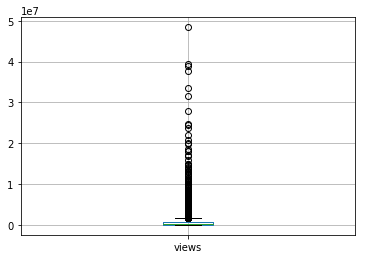

In [0]:
cleared.boxplot(column='views')

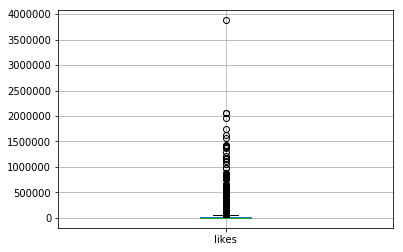

In [0]:
cleared.boxplot(column='likes')

Widzimy, że średnie odtworzeń, lajków, dislajków i komentarzy są w każdym przypadku większe niż ich mediana.
Co więcej, średnie odtworzeń, lajków, dislajków i komentarzy są większe od kwantyla górnego.
Wynika z tego że istnieje niewielki podzbiór filmików o znacznie większej popularności niż reszta

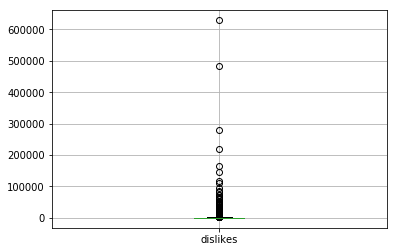

In [0]:
cleared.boxplot(column='dislikes')

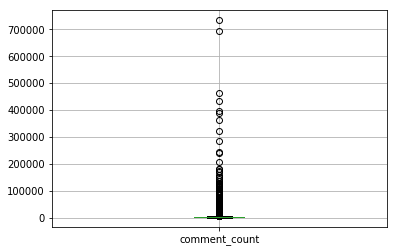

In [0]:
cleared.boxplot(column='comment_count')

In [0]:
cleared.shape

(6455, 16)

In [0]:
cleared.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [0]:
stat2, p2 = shapiro(cleared.views)
print(p2)

0.0


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [0]:
'''Average views'''
videos['views'].mean()

2360784.6382573447

In [0]:
'''Average likes'''
videos['likes'].mean()

74266.7024347359

In [0]:
'''Average dislikes'''
videos['dislikes'].mean()

3711.400888910596

In [0]:
'''Average comment count'''
videos['comment_count'].mean()

8446.803682629612

Histogram ilości wyświetleń

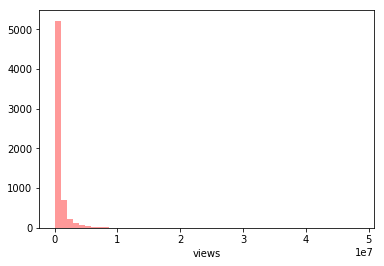

In [0]:
fig, ax = plt.subplots()
_ = sns.distplot(cleared["views"], ax = ax, kde = False, color = "red")

Funkcja mapuje dane funkcją transform_func i zwraca dataFrame z przetransformowanymi danymi. Przykład:
  Dla kolumny : [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], i transfor_func zwwracającej True jeśli liczba jest większa od 5, kolumna po wywołaniu będzie wyglądać następująco : [ False, False, False, False, False, True, True, True, True, True]

In [0]:
def get_transformed_data(data, key, transform_func = lambda elem: elem) :
    '''Mapowanie danych w kolumnie przez transform_func'''
    if ( not type(key) == str):
        raise(Exception('Bad argument'))

    res = data.copy(deep = True)

    collumn = res[key]

    for i in range(0, len(collumn)):
        collumn[i] = transform_func(collumn[i])

    return res

Funkcja zwraca dataFrame z ununiętymi danymi które nie spełniają keep_if_predicate.

In [0]:
def get_filtered_data(data, key, keep_if_predicate = lambda elem : True):
    '''Usuwanie danych nie spełniających keep_if_predicate'''
    if ( not type(key) == str):
        raise(Exception('Bad argument'))

    res = data.copy(deep=True)
    collumn = res[key]

    for i in range(0, len(collumn)):
        if not keep_if_predicate(collumn[i]):
            res.drop([i], axis=0, inplace=True)

    return res

In [0]:
cleared.groupby('channel_title').sum()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
channel_title,,,,,,,,
12 News,22,85643,170,45,0,0.0,0.0,0.0
1MILLION Dance Studio,96,1733477,122066,1276,8527,0.0,0.0,0.0
1theK (원더케이),50,7035666,702920,8435,49777,0.0,0.0,0.0
20th Century Fox,17,48572239,1204019,21395,78337,0.0,0.0,0.0
2CELLOS,10,205869,11198,120,446,0.0,0.0,0.0
3Blue1Brown,81,764897,43188,262,3680,0.0,0.0,0.0
3D Printing Nerd,56,88340,3662,103,699,0.0,0.0,0.0
42Fab - Metalworking and Multi-Medium Fabrication,26,17812,230,26,54,0.0,0.0,0.0
494ta,1,637942,793,38,137,0.0,0.0,0.0


In [0]:
cleared.groupby('channel_title').count()


,video_id,trending_date,title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
channel_title,,,,,,,,,,,,,,,
12 News,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1MILLION Dance Studio,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1theK (원더케이),5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
20th Century Fox,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
2CELLOS,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3Blue1Brown,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3D Printing Nerd,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
42Fab - Metalworking and Multi-Medium Fabrication,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
494ta,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [0]:
stat3, p3 = shapiro(cleared.groupby('channel_title').count())
stat4, p4 = stats.normaltest(cleared.groupby('channel_title').count())

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [0]:
print(str(p3) + " " + str(p4))

0.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Rozkład ilości filmików w zależności od kanałów też nie jest normalny

Funkcja mapuje indeks kategorii w nazwę kategorii.

In [0]:
def get_category_name( category_id ):

    category_map = {
    2 : 'Autos & Vehicles',
    1 :'Film & Animation',
    10 : 'Music',
    15 : 'Pets & Animals',
    17 : 'Sports',
    18 : 'Short Movies',
    19 : 'Travel & Events',
    20 : 'Gaming',
    21 : 'Videoblogging',
    22 : 'People & Blogs',
    23 : 'Comedy',
    24 : 'Entertainment',
    25 : 'News & Politics',
    26 : 'Howto & Style',
    27 : 'Education',
    28 : 'Science & Technology',
    29 : 'Nonprofits & Activism',
    30 : 'Movies',
    31 : 'Anime / Animation',
    32 : 'Action / Adventure',
    33 : 'Classics',
    34 : 'Comedy',
    35 : 'Documentary',
    36 : 'Drama',
    37 : 'Family',
    38 : 'Foreign',
    39 : 'Horror',
    40 : 'Sci - Fi / Fantasy',
    41 : 'Thriller',
    42 : 'Shorts',
    43 : 'Shows',
    44 : 'Trailers',
    }
    return category_map[category_id]

Zmapowanie numerów kategorii na ich nazwy 

In [0]:
cleared['category_id'] = cleared['category_id'].map(get_category_name)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Funkcja formatująca opisy poszczególnych słupków w histogramie

In [0]:
def slice_collumn_description(collumn_description, slice_length):
    if ( type(collumn_description) != str ):
        raise(Exception('Cannot format non string object'))
    result = ""
    for i in range(0,len(collumn_description)):
        if ( i % slice_length == 0 ):
            result = result + "\n"
        result = result + collumn_description[i]

    return result


Inicjalizacja słownika przechowującego zliczenia do rysowania wykresów

In [0]:
counts = {}

Funkcja wstawiająca do słownika powtórzeń danych

In [0]:
def insert_to_counts(key,val):
    global counts
    if ( type(key) != str):
        return
    if ( key not in counts.keys() ):
        counts.update({key : val})
    else:
        counts[key] += val

Funkcja tworząca medianę danego pogrupowanego DataFrame według danej kolumny

In [0]:
def print_histogramme_median(groups, collumn):
    global counts
    counts = {}
    if ( type(collumn) != str ):
        raise(Exception("Collumn name must be string"))
    for key, group in groups:
        #print('{:>20}:{:>16}'.format(key, (group['dislikes']).median()) )
        insert_to_counts(slice_collumn_description(key, 8), int(round((group[collumn]).median())) )
    serie = pd.Series(counts)
    serie.plot.bar()
    plt.title('median')
    plt.show()

Funkcja tworząca dolny kwartyl danego pogrupowanego DataFrame według danej kolumny

In [0]:
def print_histogramme_down_quantile(groups, collumn):
    global counts
    counts = {}
    if ( type(collumn) != str ):
        raise(Exception("Collumn name must be string"))
    histogram_data = []
    for key, group in groups:
        #print('{:>20}:{:>16}'.format(key, (group['dislikes']).median()) )
        insert_to_counts(slice_collumn_description(key, 8), int(round((group[collumn]).quantile(0.25))) )
    serie = pd.Series(counts)
    serie.plot.bar()
    plt.title('down quantile')
    plt.show()

Funkcja tworząca górny kwartyl danego pogrupowanego DataFrame według danej kolumny

In [0]:
def print_histogramme_up_quantile(groups, collumn):
    global counts
    counts = {}
    if ( type(collumn) != str ):
        raise(Exception("Collumn name must be string"))
    histogram_data = []
    for key, group in groups:
        #print('{:>20}:{:>16}'.format(key, (group['dislikes']).median()) )
        insert_to_counts(slice_collumn_description(key, 8), int(round((group[collumn]).quantile(0.75))) )
        #histogram_data += int(round((group[collumn]).quantile(0.75))) * [slice_collumn_description(key, 6)]
    serie = pd.Series(counts)
    serie.plot.bar()
    plt.title('up quantile')
    plt.show()

Funkcja tworząca rozstęp międzykwartylowy danego pogrupowanego DataFrame według danej kolumny

In [0]:
def print_histogramme_interquartile_range(groups, collumn):
    global counts
    counts = {}
    if ( type(collumn) != str ):
        raise(Exception("Collumn name must be string"))
    histogram_data = []
    for key, group in groups:
        #print('{:>20}:{:>16}'.format(key, (group['dislikes']).median()) )
        #histogram_data += int(round((group[collumn]).quantile(0.75) - (group[collumn]).quantile(0.25)) ) * [slice_collumn_description(key,6)]
        insert_to_counts(slice_collumn_description(key, 8), int(round((group[collumn]).quantile(0.75) - (group[collumn]).quantile(0.25)) ))
    serie = pd.Series(counts)
    serie.plot.bar()
    plt.title('interquartile range')
    plt.show()

Funkcja tworząca rozstęp maksymalną wartość danego pogrupowanego DataFrame według danej kolumny

In [0]:
def print_histogramme_max(groups, collumn):
    global counts
    counts = {}
    if ( type(collumn) != str ):
        raise(Exception("Collumn name must be string"))
    histogram_data = []
    for key, group in groups:
        #print('{:>20}:{:>16}'.format(key, (group['dislikes']).median()) )
        #histogram_data += int(round((group[collumn]).max() ) ) * [slice_collumn_description(key, 6 )]
        insert_to_counts(slice_collumn_description(key, 8), int(round((group[collumn]).max())))
    serie = pd.Series(counts)
    serie.plot.bar()
    plt.title('max')
    plt.show()

Funkcja tworząca rozstęp minimalną wartość danego pogrupowanego DataFrame według danej kolumny

In [0]:
def print_histogramme_min(groups, collumn):
    global counts
    counts = {}
    if ( type(collumn) != str ):
        raise(Exception("Collumn name must be string"))
    histogram_data = []
    for key, group in groups:
        #print('{:>20}:{:>16}'.format(key, (group['dislikes']).median()) )
        #histogram_data += int(round((group[collumn]).min() ) ) * [slice_collumn_description(key, 6 )]
        insert_to_counts(slice_collumn_description(key, 8), int(round((group[collumn]).min())))
    serie = pd.Series(counts)
    serie.plot.bar()
    plt.title('min')
    plt.show()

Funkcja tworząca różnicę między wartością maksymalną, a minimalną dla danego pogrupowanego DataFrame według danej kolumny

In [0]:
def print_histogramme_difference(groups, collumn):
    global counts
    counts = {}
    if ( type(collumn) != str ):
        raise(Exception("Collumn name must be string"))
    histogram_data = []
    for key, group in groups:
        #print('{:>20}:{:>16}'.format(key, (group['dislikes']).median()) )
        #histogram_data += int(round((group[collumn]).max() - (group[collumn]).min() ) ) * [slice_collumn_description(key, 6)]
        insert_to_counts(slice_collumn_description(key, 8), int(round((group[collumn]).max() - (group[collumn]).min() ) ) )
    serie = pd.Series(counts)
    serie.plot.bar()
    plt.title('difference')
    plt.show()

Funkcja tworząca wartiancję dla danego pogrupowanego DataFrame według danej kolumny

In [0]:
def print_histogramme_var(groups, collumn):
    global counts
    counts = {}
    if ( type(collumn) != str ):
        raise(Exception("Collumn name must be string"))
    histogram_data = []
    for key, group in groups:
        #print('{:>20}:{:>16}'.format(key, (group['dislikes']).median()) )
        #histogram_data += int(round(np.sqrt((group[collumn]).var())) ) * [slice_collumn_description(key, 6)]
        insert_to_counts(slice_collumn_description(key, 8), int(round(np.sqrt((group[collumn]).var())) ))
    serie = pd.Series(counts)
    serie.plot.bar()
    plt.title('var')
    plt.show()

Funkcja wypisująca wszystkie powyższe histogramy dla danej kolumny

In [0]:
def print_all_histogramms(groups, collumn):
  print_histogramme_median(groups, collumn)
  print_histogramme_down_quantile(groups, collumn)
  print_histogramme_up_quantile(groups, collumn)
  print_histogramme_interquartile_range(groups, collumn)
  print_histogramme_max(groups, collumn)
  print_histogramme_min(groups, collumn)
  print_histogramme_difference(groups, collumn)
  print_histogramme_var(groups, collumn)

**WYŚWIETLENIA:**

Średnia liczba wyświetlań dla poszczególnych kategorii:

In [0]:
groups = cleared.groupby('category_id')
means = groups.mean()['views']
means.sort_values(ascending = False)

category_id
Music                    1.476113e+06
Gaming                   1.207646e+06
Nonprofits & Activism    9.574350e+05
Film & Animation         9.261853e+05
Entertainment            8.278752e+05
Sports                   8.226218e+05
Comedy                   7.745786e+05
People & Blogs           7.093150e+05
Science & Technology     5.813676e+05
Howto & Style            4.724811e+05
Autos & Vehicles         3.969387e+05
Shows                    3.923588e+05
Education                3.610156e+05
Pets & Animals           2.947162e+05
Travel & Events          2.686901e+05
News & Politics          2.501705e+05
Name: views, dtype: float64

Mediana dla liczby wyświetlań dla poszczególnych kategorii:

In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['views']).median()) )

    Autos & Vehicles:        150609.0
              Comedy:        488580.0
           Education:        233448.0
       Entertainment:        325804.0
    Film & Animation:        349383.0
              Gaming:        656404.5
       Howto & Style:        240659.0
               Music:        380480.0
     News & Politics:         84968.0
Nonprofits & Activism:         23866.0
      People & Blogs:        224742.0
      Pets & Animals:        157979.5
Science & Technology:        235349.0
               Shows:        383647.5
              Sports:        300075.0
     Travel & Events:        200068.0


Kwantyl dolny:

In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['views']).quantile(0.25)) )

    Autos & Vehicles:         33272.5
              Comedy:        149097.0
           Education:        145226.5
       Entertainment:       103180.25
    Film & Animation:         56072.0
              Gaming:        161524.5
       Howto & Style:         84715.5
               Music:        110822.0
     News & Politics:         21759.5
Nonprofits & Activism:          7772.5
      People & Blogs:         84490.0
      Pets & Animals:        64873.75
Science & Technology:        72806.75
               Shows:        91736.25
              Sports:        98725.25
     Travel & Events:         59758.0


Kwantyl górny:

In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['views']).quantile(0.75)) )

    Autos & Vehicles:       546863.25
              Comedy:       1030313.0
           Education:        396935.0
       Entertainment:       839683.25
    Film & Animation:       1267983.0
              Gaming:       1663793.0
       Howto & Style:       575034.25
               Music:       1063265.5
     News & Politics:        316235.5
Nonprofits & Activism:        166376.5
      People & Blogs:        739895.0
      Pets & Animals:        355153.5
Science & Technology:        622540.5
               Shows:        684270.0
              Sports:       753776.25
     Travel & Events:        365603.0


Rozstęp międzykwartlowy:

In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['views']).quantile(0.75) - (group['views']).quantile(0.25)) )

    Autos & Vehicles:       513590.75
              Comedy:        881216.0
           Education:        251708.5
       Entertainment:        736503.0
    Film & Animation:       1211911.0
              Gaming:       1502268.5
       Howto & Style:       490318.75
               Music:        952443.5
     News & Politics:        294476.0
Nonprofits & Activism:        158604.0
      People & Blogs:        655405.0
      Pets & Animals:       290279.75
Science & Technology:       549733.75
               Shows:       592533.75
              Sports:        655051.0
     Travel & Events:        305845.0


Maksymalna liczba wyświetleń dla poszczególnych kategorii:

In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['views']).max()) )

    Autos & Vehicles:         4361881
              Comedy:         7177410
           Education:         2769297
       Entertainment:        37736281
    Film & Animation:        10385748
              Gaming:         6886948
       Howto & Style:         7566372
               Music:        48431654
     News & Politics:         4857665
Nonprofits & Activism:         8041970
      People & Blogs:        20921796
      Pets & Animals:         2184856
Science & Technology:        15006579
               Shows:          765531
              Sports:        14647590
     Travel & Events:         1851299


Minimalna liczba wyświetleń dla poszczególnych kategorii:

In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['views']).min()) )

    Autos & Vehicles:            2860
              Comedy:            1807
           Education:             773
       Entertainment:             798
    Film & Animation:             943
              Gaming:            1237
       Howto & Style:            1107
               Music:            1591
     News & Politics:             549
Nonprofits & Activism:            1456
      People & Blogs:             884
      Pets & Animals:            3393
Science & Technology:             983
               Shows:           36609
              Sports:             658
     Travel & Events:             789


Rozstęp liczby wyświetleń dla poszczególnych kategorii:

In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['views'].max() - group['views'].min() ) ) )


    Autos & Vehicles:         4359021
              Comedy:         7175603
           Education:         2768524
       Entertainment:        37735483
    Film & Animation:        10384805
              Gaming:         6885711
       Howto & Style:         7565265
               Music:        48430063
     News & Politics:         4857116
Nonprofits & Activism:         8040514
      People & Blogs:        20920912
      Pets & Animals:         2181463
Science & Technology:        15005596
               Shows:          728922
              Sports:        14646932
     Travel & Events:         1850510


Odchylenie standardowe dla liczby wyświetleń:

In [0]:
for key, group in groups:
    print('{:>20}:{:>20}'.format(key, np.sqrt((group['views']).var())) )

    Autos & Vehicles:   638376.9285051583
              Comedy:   937083.9681337501
           Education:   424058.5573772929
       Entertainment:  2002553.2523835364
    Film & Animation:  1493236.5348523648
              Gaming:  1504321.2455531708
       Howto & Style:   729933.3770968313
               Music:   3898330.169350798
     News & Politics:   434371.8189158471
Nonprofits & Activism:   2422783.559440905
      People & Blogs:  1513615.4434677702
      Pets & Animals:   394434.2836900752
Science & Technology:  1277857.3677477553
               Shows:   372205.3752382547
              Sports:  1774740.9436058681
     Travel & Events:  307891.82383146504


Histogramy:

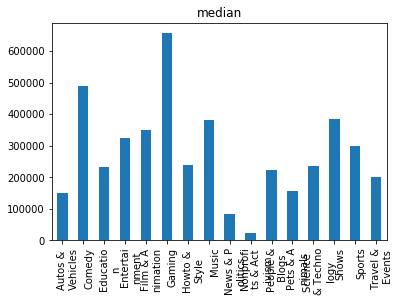

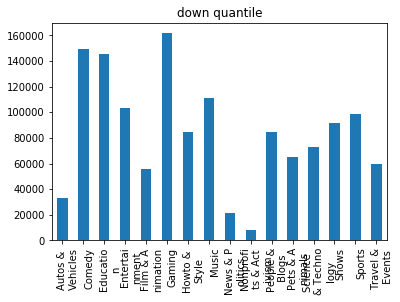

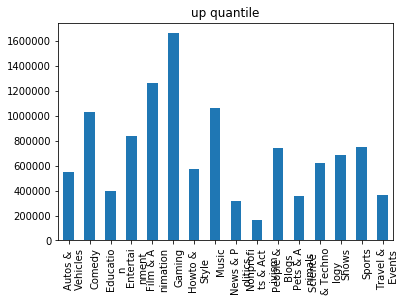

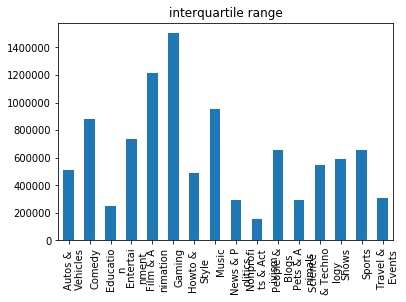

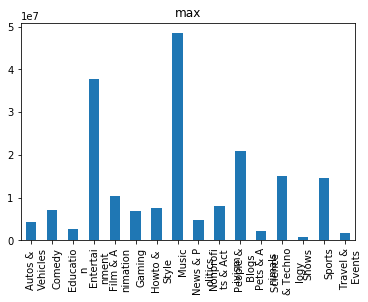

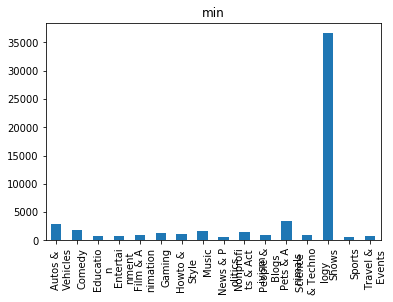

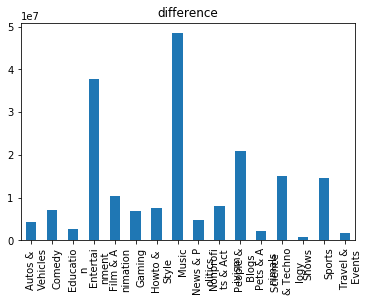

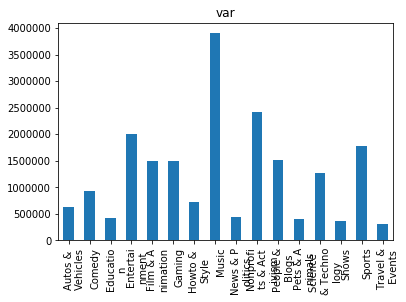

In [0]:
print_all_histogramms(groups, 'views')

**KLIKNIĘCIA 'LIKE':**

Średnia liczba kliknięć dla poszczególnych kategorii:

In [0]:
#videos['category_id'] = videos['category_id'].map(get_category_name)
groups = cleared.groupby('category_id')
means = groups.mean()['likes']
means.sort_values(ascending = False)

category_id
Music                    103725.312576
Nonprofits & Activism    103604.666667
Gaming                    49470.538462
Comedy                    39093.529946
People & Blogs            32012.178218
Film & Animation          30317.915888
Entertainment             27172.359927
Howto & Style             23814.669435
Sports                    19690.260965
Science & Technology      17831.912821
Education                 15891.746094
Shows                     11786.250000
Pets & Animals            11277.063380
Autos & Vehicles           6260.708333
Travel & Events            5681.000000
News & Politics            3890.405088
Name: likes, dtype: float64

In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['likes']).median()) )


    Autos & Vehicles:          1798.5
              Comedy:         17037.0
           Education:          9798.0
       Entertainment:          7639.0
    Film & Animation:          6563.0
              Gaming:         22783.5
       Howto & Style:         11295.0
               Music:         23709.0
     News & Politics:           736.0
Nonprofits & Activism:           686.0
      People & Blogs:          9195.0
      Pets & Animals:          6711.0
Science & Technology:          8135.0
               Shows:         11114.0
              Sports:          3561.0
     Travel & Events:          3300.0


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['likes']).quantile(0.25)))

    Autos & Vehicles:          374.25
              Comedy:          5160.5
           Education:          5658.0
       Entertainment:         2153.75
    Film & Animation:          1291.0
              Gaming:          6797.0
       Howto & Style:         3525.25
               Music:          5074.5
     News & Politics:           167.0
Nonprofits & Activism:            70.5
      People & Blogs:          2724.0
      Pets & Animals:         2382.75
Science & Technology:         1524.25
               Shows:         2862.75
              Sports:          1129.0
     Travel & Events:           766.0


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['likes']).quantile(0.75)) )

    Autos & Vehicles:          9339.0
              Comedy:         45842.0
           Education:         14892.0
       Entertainment:        22349.25
    Film & Animation:         35093.0
              Gaming:        75677.75
       Howto & Style:         28167.0
               Music:         85955.5
     News & Politics:          3399.0
Nonprofits & Activism:          4273.5
      People & Blogs:         29162.0
      Pets & Animals:        15621.25
Science & Technology:         19732.5
               Shows:         20037.5
              Sports:         8289.75
     Travel & Events:          9156.0


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['likes']).quantile(0.75) - (group['likes']).quantile(0.25)) )

    Autos & Vehicles:         8964.75
              Comedy:         40681.5
           Education:          9234.0
       Entertainment:         20195.5
    Film & Animation:         33802.0
              Gaming:        68880.75
       Howto & Style:        24641.75
               Music:         80881.0
     News & Politics:          3232.0
Nonprofits & Activism:          4203.0
      People & Blogs:         26438.0
      Pets & Animals:         13238.5
Science & Technology:        18208.25
               Shows:        17174.75
              Sports:         7160.75
     Travel & Events:          8390.0


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['likes']).max()) )

    Autos & Vehicles:           28361
              Comedy:          442915
           Education:          163576
       Entertainment:         1735895
    Film & Animation:          409750
              Gaming:          340240
       Howto & Style:          293145
               Music:         3880071
     News & Politics:          125700
Nonprofits & Activism:         1167488
      People & Blogs:         1366736
      Pets & Animals:          108555
Science & Technology:          278743
               Shows:           24107
              Sports:          889008
     Travel & Events:           21626


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['likes']).min()) )

    Autos & Vehicles:               4
              Comedy:               6
           Education:               0
       Entertainment:               0
    Film & Animation:               0
              Gaming:               2
       Howto & Style:               0
               Music:               0
     News & Politics:               0
Nonprofits & Activism:               0
      People & Blogs:               0
      Pets & Animals:               6
Science & Technology:               0
               Shows:             810
              Sports:               0
     Travel & Events:               3


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['likes'].max() - group['likes'].min() ) ) )

    Autos & Vehicles:           28357
              Comedy:          442909
           Education:          163576
       Entertainment:         1735895
    Film & Animation:          409750
              Gaming:          340238
       Howto & Style:          293145
               Music:         3880071
     News & Politics:          125700
Nonprofits & Activism:         1167488
      People & Blogs:         1366736
      Pets & Animals:          108549
Science & Technology:          278743
               Shows:           23297
              Sports:          889008
     Travel & Events:           21623


In [0]:
for key, group in groups:
    print('{:>20}:{:>20}'.format(key, np.sqrt((group['likes']).var())) )

    Autos & Vehicles:    8465.91883391666
              Comedy:  59377.191300781145
           Education:  26177.752235363172
       Entertainment:   86769.16839172764
    Film & Animation:  54903.126181163665
              Gaming:  62347.209757939025
       Howto & Style:   35767.03616877136
               Music:  263412.29769357806
     News & Politics:   8719.703707993163
Nonprofits & Activism:   308878.2113158302
      People & Blogs:     82397.329063204
      Pets & Animals:  14073.230921519855
Science & Technology:   29633.20517083412
               Shows:  11368.109821631153
              Sports:   76620.37977922041
     Travel & Events:   5733.788739786285


Histogramy:

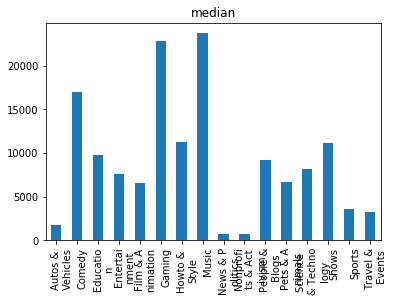

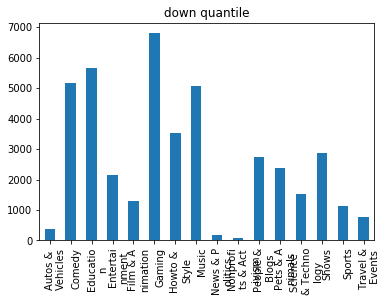

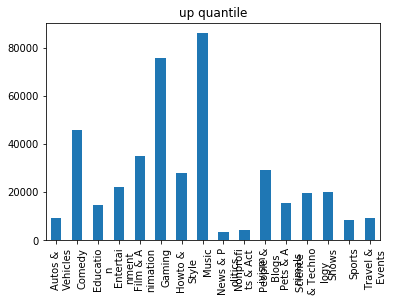

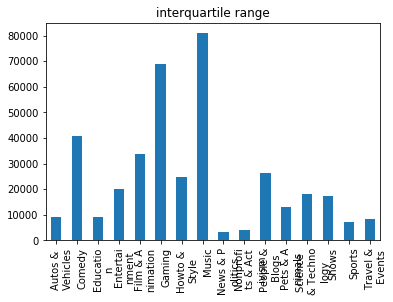

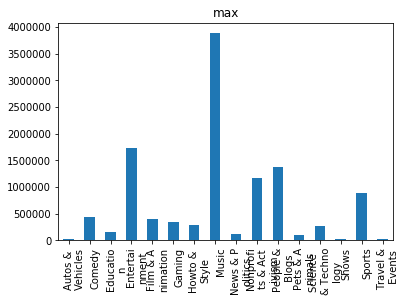

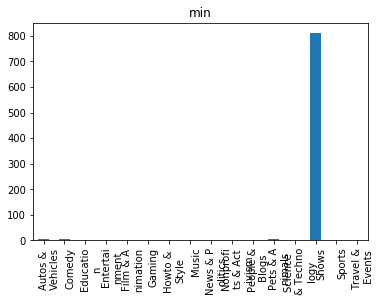

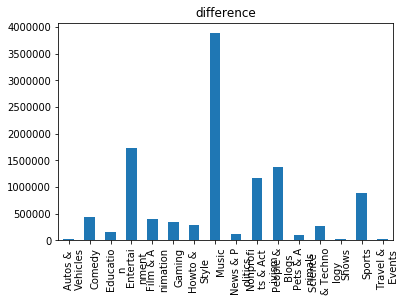

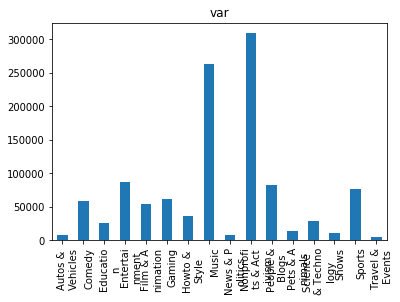

In [0]:
print_all_histogramms(groups, 'likes')

**KLIKNIĘCIA 'DISLIKE':**

In [0]:
# videos['category_id'] = videos['category_id'].map(get_category_name)
groups = cleared.groupby('category_id')
means = groups.mean()['dislikes']
print(means.sort_values(ascending = False))

category_id
Nonprofits & Activism    14161.666667
Gaming                    3652.423077
Music                     2550.748474
Entertainment             1852.656516
People & Blogs            1686.172277
Comedy                    1044.036298
Sports                    1042.618421
News & Politics            952.500978
Film & Animation           928.015576
Science & Technology       779.515385
Howto & Style              608.189369
Education                  444.527344
Autos & Vehicles           366.916667
Travel & Events            314.030769
Shows                      254.250000
Pets & Animals             216.225352
Name: dislikes, dtype: float64


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['dislikes']).median()) )

    Autos & Vehicles:           108.5
              Comedy:           448.0
           Education:           215.0
       Entertainment:           268.0
    Film & Animation:           266.0
              Gaming:           703.5
       Howto & Style:           229.5
               Music:           367.0
     News & Politics:           167.0
Nonprofits & Activism:            33.0
      People & Blogs:           209.0
      Pets & Animals:           108.0
Science & Technology:           214.5
               Shows:           245.0
              Sports:           168.5
     Travel & Events:            94.0


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['dislikes']).quantile(0.25)))

    Autos & Vehicles:           32.25
              Comedy:           132.0
           Education:           100.0
       Entertainment:            92.0
    Film & Animation:            42.0
              Gaming:          156.75
       Howto & Style:            84.0
               Music:           105.0
     News & Politics:            38.5
Nonprofits & Activism:             3.0
      People & Blogs:            60.0
      Pets & Animals:            31.5
Science & Technology:           44.75
               Shows:           151.5
              Sports:            44.0
     Travel & Events:            31.0


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['dislikes']).quantile(0.75)) )

    Autos & Vehicles:          367.25
              Comedy:          1181.5
           Education:          508.25
       Entertainment:           767.5
    Film & Animation:          1028.0
              Gaming:         2476.75
       Howto & Style:           579.5
               Music:          1566.0
     News & Politics:           508.0
Nonprofits & Activism:           159.0
      People & Blogs:           835.0
      Pets & Animals:           283.0
Science & Technology:           690.0
               Shows:          347.75
              Sports:          509.75
     Travel & Events:           300.0


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['dislikes']).quantile(0.75) - (group['dislikes']).quantile(0.25)) )

    Autos & Vehicles:           335.0
              Comedy:          1049.5
           Education:          408.25
       Entertainment:           675.5
    Film & Animation:           986.0
              Gaming:          2320.0
       Howto & Style:           495.5
               Music:          1461.0
     News & Politics:           469.5
Nonprofits & Activism:           156.0
      People & Blogs:           775.0
      Pets & Animals:           251.5
Science & Technology:          645.25
               Shows:          196.25
              Sports:          465.75
     Travel & Events:           269.0


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['dislikes']).max()) )

    Autos & Vehicles:            9681
              Comedy:           28023
           Education:            5684
       Entertainment:          629120
    Film & Animation:           10274
              Gaming:          164004
       Howto & Style:           21877
               Music:           96407
     News & Politics:          110707
Nonprofits & Activism:          147643
      People & Blogs:          218841
      Pets & Animals:            2499
Science & Technology:           26234
               Shows:             461
              Sports:          117128
     Travel & Events:            3068


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['dislikes']).min()) )

    Autos & Vehicles:               0
              Comedy:               0
           Education:               0
       Entertainment:               0
    Film & Animation:               0
              Gaming:               0
       Howto & Style:               0
               Music:               0
     News & Politics:               0
Nonprofits & Activism:               0
      People & Blogs:               0
      Pets & Animals:               0
Science & Technology:               0
               Shows:              66
              Sports:               0
     Travel & Events:               0


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['dislikes'].max() - group['dislikes'].min() ) ) )

    Autos & Vehicles:            9681
              Comedy:           28023
           Education:            5684
       Entertainment:          629120
    Film & Animation:           10274
              Gaming:          164004
       Howto & Style:           21877
               Music:           96407
     News & Politics:          110707
Nonprofits & Activism:          147643
      People & Blogs:          218841
      Pets & Animals:            2499
Science & Technology:           26234
               Shows:             395
              Sports:          117128
     Travel & Events:            3068


In [0]:
for key, group in groups:
    print('{:>20}:{:>20}'.format(key, np.sqrt((group['dislikes']).var())) )

    Autos & Vehicles:   1154.524007155586
              Comedy:   2002.033820109416
           Education:   688.8118152996841
       Entertainment:  21017.513717562568
    Film & Animation:  1577.0395692187371
              Gaming:  16367.199997587119
       Howto & Style:   1438.509269749303
               Music:   7574.826554308369
     News & Politics:   5243.146479677251
Nonprofits & Activism:  40384.762511314075
      People & Blogs:  11236.618327438715
      Pets & Animals:   321.5863029960975
Science & Technology:   2166.869735567766
               Shows:  170.10266507808356
              Sports:   5998.286848760367
     Travel & Events:   585.0540832166386


Histogramy:

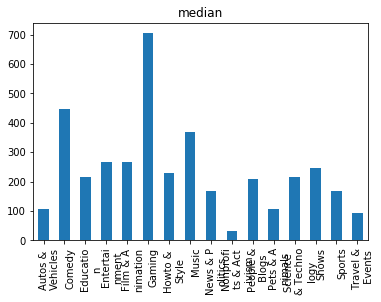

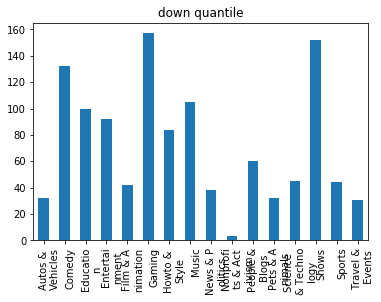

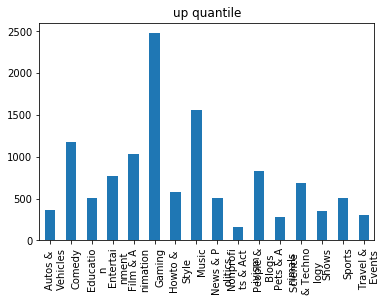

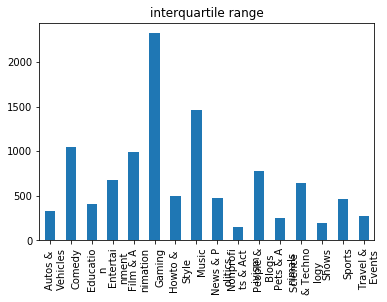

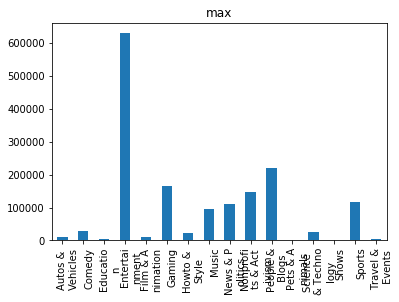

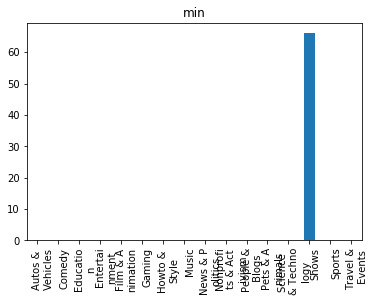

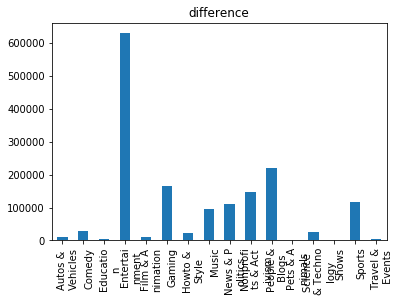

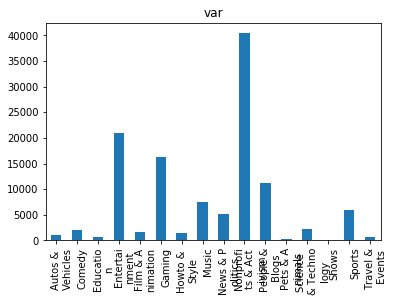

In [0]:
print_all_histogramms(groups, 'dislikes')

**KOMENTARZE**

In [0]:
groups = cleared.groupby('category_id')
means = groups.mean()['comment_count']
print(means.sort_values(ascending = False))

category_id
Nonprofits & Activism    29612.466667
Music                    10340.279609
Gaming                   10193.298077
People & Blogs            4670.429703
Comedy                    4206.023593
Entertainment             4189.474421
Film & Animation          4076.713396
Howto & Style             3885.458472
Sports                    2564.848684
Science & Technology      2469.853846
Education                 1952.835938
Pets & Animals            1669.823944
News & Politics           1498.356164
Autos & Vehicles          1250.694444
Shows                     1228.750000
Travel & Events           1025.061538
Name: comment_count, dtype: float64


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['comment_count']).median()) )

    Autos & Vehicles:           288.5
              Comedy:          1399.0
           Education:          1014.0
       Entertainment:           825.5
    Film & Animation:           782.0
              Gaming:          3694.5
       Howto & Style:          1052.5
               Music:          1667.0
     News & Politics:           445.0
Nonprofits & Activism:            37.0
      People & Blogs:           914.0
      Pets & Animals:           590.5
Science & Technology:           873.0
               Shows:          1435.0
              Sports:           670.0
     Travel & Events:           451.0


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['comment_count']).quantile(0.25)))

    Autos & Vehicles:           47.75
              Comedy:           421.5
           Education:          548.75
       Entertainment:          268.25
    Film & Animation:           139.0
              Gaming:          605.75
       Howto & Style:           371.0
               Music:           413.5
     News & Politics:            81.0
Nonprofits & Activism:            13.0
      People & Blogs:           289.0
      Pets & Animals:          220.75
Science & Technology:          178.25
               Shows:          1124.5
              Sports:          203.25
     Travel & Events:           113.0


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['comment_count']).quantile(0.75)) )

    Autos & Vehicles:          1676.0
              Comedy:          4126.5
           Education:          2335.5
       Entertainment:          2446.5
    Film & Animation:          4170.0
              Gaming:        12057.25
       Howto & Style:          2740.5
               Music:          6859.5
     News & Politics:          1410.5
Nonprofits & Activism:           665.5
      People & Blogs:          2685.0
      Pets & Animals:         1632.75
Science & Technology:         2334.25
               Shows:         1539.25
              Sports:         1826.25
     Travel & Events:          1586.0


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['comment_count']).quantile(0.75) - (group['comment_count']).quantile(0.25)) )

    Autos & Vehicles:         1628.25
              Comedy:          3705.0
           Education:         1786.75
       Entertainment:         2178.25
    Film & Animation:          4031.0
              Gaming:         11451.5
       Howto & Style:          2369.5
               Music:          6446.0
     News & Politics:          1329.5
Nonprofits & Activism:           652.5
      People & Blogs:          2396.0
      Pets & Animals:          1412.0
Science & Technology:          2156.0
               Shows:          414.75
              Sports:          1623.0
     Travel & Events:          1473.0


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['comment_count']).max()) )

    Autos & Vehicles:            8316
              Comedy:           75753
           Education:           17991
       Entertainment:          733373
    Film & Animation:           87691
              Gaming:          115501
       Howto & Style:          171128
               Music:          692305
     News & Politics:           35908
Nonprofits & Activism:          363133
      People & Blogs:          321455
      Pets & Animals:           32598
Science & Technology:           89194
               Shows:            1825
              Sports:           71486
     Travel & Events:            4533


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['comment_count']).min()) )

    Autos & Vehicles:               0
              Comedy:               0
           Education:               0
       Entertainment:               0
    Film & Animation:               0
              Gaming:               0
       Howto & Style:               0
               Music:               0
     News & Politics:               0
Nonprofits & Activism:               0
      People & Blogs:               0
      Pets & Animals:               0
Science & Technology:               0
               Shows:             220
              Sports:               0
     Travel & Events:               0


In [0]:
for key, group in groups:
    print('{:>20}:{:>16}'.format(key, (group['comment_count'].max() - group['comment_count'].min() ) ) )

    Autos & Vehicles:            8316
              Comedy:           75753
           Education:           17991
       Entertainment:          733373
    Film & Animation:           87691
              Gaming:          115501
       Howto & Style:          171128
               Music:          692305
     News & Politics:           35908
Nonprofits & Activism:          363133
      People & Blogs:          321455
      Pets & Animals:           32598
Science & Technology:           89194
               Shows:            1605
              Sports:           71486
     Travel & Events:            4533


In [0]:
for key, group in groups:
    print('{:>20}:{:>20}'.format(key, np.sqrt((group['comment_count']).var())) )

    Autos & Vehicles:  1999.9421445074734
              Comedy:   8016.253583891952
           Education:   2767.958625660813
       Entertainment:  26034.449466774633
    Film & Animation:   8637.559275417521
              Gaming:  16513.852384594895
       Howto & Style:  12830.104251612982
               Music:   37931.56205729364
     News & Politics:   3303.816541450943
Nonprofits & Activism:   94383.62106308991
      People & Blogs:     21433.755590697
      Pets & Animals:  3395.1729424596138
Science & Technology:    6174.82289134754
               Shows:   697.2160712433413
              Sports:   6840.882045910763
     Travel & Events:  1221.9699627666166


Histogramy:

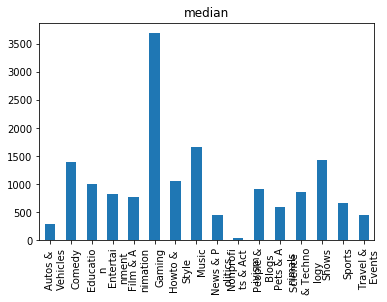

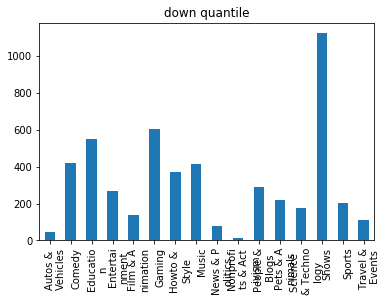

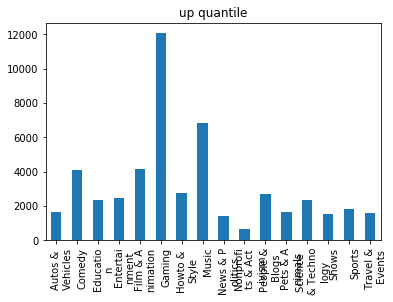

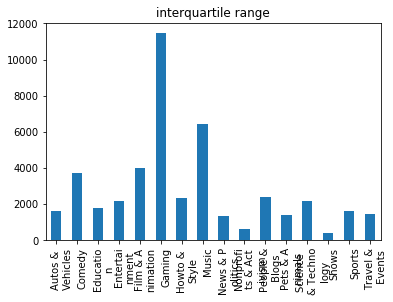

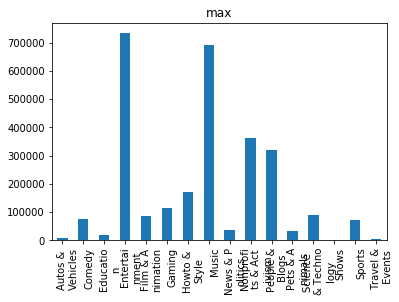

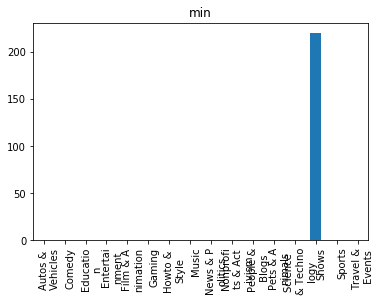

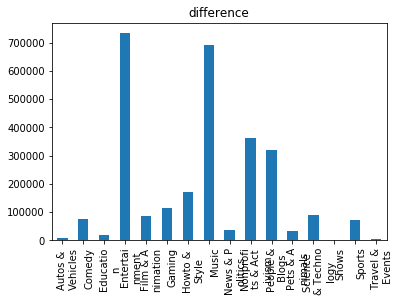

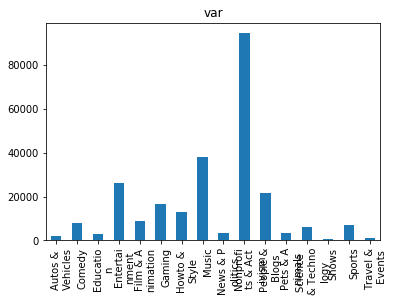

In [0]:
print_all_histogramms(groups, 'comment_count')

# Korelacje

In [0]:
cleared.corr()

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
views,1.000000,0.750826,0.392653,0.589413,0.011443,0.009686,0.002591
likes,0.750826,1.000000,0.361905,0.806204,-0.025570,-0.020362,-0.002543
dislikes,0.392653,0.361905,1.000000,0.680250,-0.003154,-0.008185,0.000418
comment_count,0.589413,0.806204,0.680250,1.000000,-0.027217,-0.013956,-0.001755
comments_disabled,0.011443,-0.025570,-0.003154,-0.027217,1.000000,0.295850,-0.003217
ratings_disabled,0.009686,-0.020362,-0.008185,-0.013956,0.295850,1.000000,-0.001702
video_error_or_removed,0.002591,-0.002543,0.000418,-0.001755,-0.003217,-0.001702,1.000000


Dzięki powyszej tabeli widzimy korelacje ilości wyświetleń, polubień i komentarzy, czego można było się spodziewać - częściej oglądany filmik powinien być częściej komentowany i lubiany. Z "dislikami" nie ma tak mocnej korelacji prawdopodobnie dlatego, że większość ludzi którzy nie lubią filmiku rzadko go wyświetla więcej niż raz, a osoby które go polubiły, mogą go wyświetlać więcej razy. Zbiór danych opiera się na filmikach z listy polecanych, więc raczej są to filmiki mające dużo więcej "lajków" niż "dislików". 

Co ciekawe istnieje też korelacja między ilością komentarzy i "dislajków". Prawdopodobnie wynika to z tego, że osoby którym filmik się nie podobał często uargumentowują w komentarzu czemu, niekiedy doprowadzając do dyskusji

Sprawdźmy jak by to wyglądało dla filmików z wyłączonymi komentarzami

In [0]:
comments_disabled = cleared[cleared.comments_disabled == False]

In [0]:
comments_disabled.corr()

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
views,1.000000,0.759012,0.395660,0.596935,NaN,-0.005786,0.002659
likes,0.759012,1.000000,0.361891,0.806301,NaN,-0.013543,-0.002627
dislikes,0.395660,0.361891,1.000000,0.680762,NaN,-0.005402,0.000408
comment_count,0.596935,0.806301,0.680762,1.000000,NaN,-0.008961,-0.001843
comments_disabled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ratings_disabled,-0.005786,-0.013543,-0.005402,-0.008961,NaN,1.000000,-0.001137
video_error_or_removed,0.002659,-0.002627,0.000408,-0.001843,NaN,-0.001137,1.000000


# Linear regression of likes and views

In [0]:
views_and_likes = cleared[['views', 'likes']]
views_and_likes.head()

,views,likes
0,748374,57527
1,2418783,97185
2,3191434,146033
3,343168,10172
4,2095731,132235


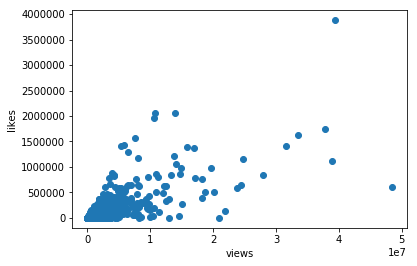

In [0]:
plt.scatter(views_and_likes[['views']], views_and_likes[['likes']])
plt.xlabel("views")
plt.ylabel("likes")
plt.show()

In [0]:
lm = linear_model.LinearRegression()
model = lm.fit(views_and_likes[['views']], views_and_likes[['likes']])
lm.score(views_and_likes[['views']], views_and_likes[['likes']]) # współczynnik determinacji

0.5637401826719866

In [0]:
likes_predict = model.predict # linear regression
likes_predict(views_and_likes[['views']])

array([[ 33404.56522102],
       [107094.21504431],
       [141179.50890086],
       ...,
       [ 38513.71321668],
       [ 24218.77459462],
       [ 13461.2200867 ]])

Text(0.5, 1.0, 'likes[views]')

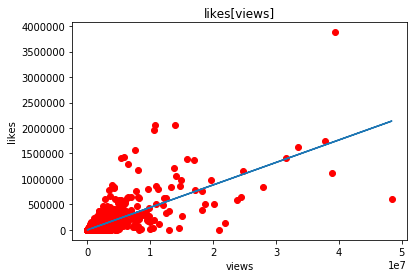

In [0]:
plt.scatter(views_and_likes[['views']], views_and_likes[['likes']], color = "red")
plt.plot(views_and_likes[['views']], likes_predict(views_and_likes[['views']]))
plt.xlabel("views")
plt.ylabel("likes") 
plt.title('likes[views]')

# Analiza i Regresja tylko dla odtworzeń mniejszych niż średnia

In [0]:
means = []
for i in range (cleared.shape[0]):
  means.append(int((cleared["views"].mean())))
#mean_vals = pd.DataFrame({"mean": means})

In [0]:
lower_vals = cleared[cleared.views < cleared["views"].mean()]

In [0]:
lower_vals.describe()

,views,likes,dislikes,comment_count
count,4862.000000,4862.000000,4862.000000,4862.000000
mean,227565.126697,9427.861785,362.295969,1191.065611
std,206097.533025,13904.876430,1353.824158,2380.529183
min,549.000000,0.000000,0.000000,0.000000
25%,52612.250000,1124.750000,47.250000,169.250000
50%,165197.500000,4603.000000,143.000000,563.000000
75%,352645.250000,11981.750000,356.000000,1383.750000
max,771035.000000,159356.000000,71617.000000,83363.000000


w przypadku filmików o ilości odtworzeń mniejszej niż średnia zbiór jest bardziej "zbity" - średnie odtworzeń, lajków i komentarzy są mniejsz niż kwantyl górny, ale, co ciekawe, dislajków nie


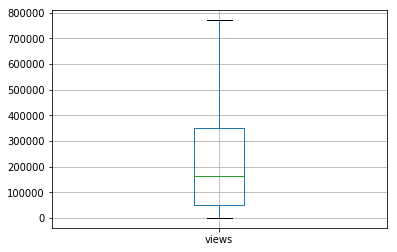

In [0]:
lower_vals.boxplot(column="views")

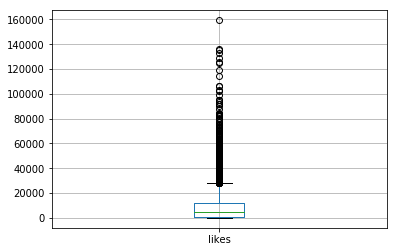

In [0]:
lower_vals.boxplot(column="likes")

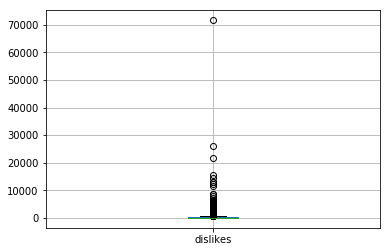

In [0]:
lower_vals.boxplot(column="dislikes")

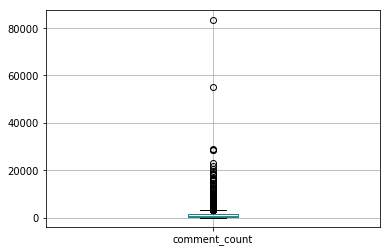

In [0]:
lower_vals.boxplot(column="comment_count")

In [0]:
cleared.shape[0]

6455

In [0]:
lower_vals.shape

(4862, 16)

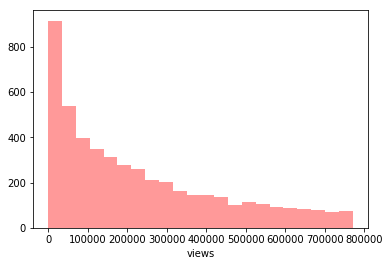

In [0]:
fig, ax = plt.subplots()
_ = sns.distplot(lower_vals["views"], ax = ax, kde = False, color = "red")

In [0]:
m = cleared["views"].mean()
print(m)

772512.7439194423


In [0]:
cleared["views"][2]

3191434

In [0]:
cleared[2:3]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [0]:
lower_vals

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,Science & Technology,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,News & Politics,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."
10,9wRQljFNDW8,17.14.11,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,Sports,2017-11-13T02:05:26.000Z,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...
11,VifQlJit6A0,17.14.11,(SPOILERS) 'Shiva Saves the Day' Talked About ...,amc,Entertainment,2017-11-13T03:00:00.000Z,"The Walking Dead|""shiva""|""tiger""|""king ezekiel...",104578,1576,303,1279,https://i.ytimg.com/vi/VifQlJit6A0/default.jpg,False,False,False,Shiva arrives just in time as King Ezekiel att...
12,5E4ZBSInqUU,17.14.11,Marshmello - Blocks (Official Music Video),marshmello,Music,2017-11-13T17:00:00.000Z,"marshmello|""blocks""|""marshmello blocks""|""block...",687582,114188,1333,8371,https://i.ytimg.com/vi/5E4ZBSInqUU/default.jpg,False,False,False,WATCH SILENCE MUSIC VIDEO ▶ https://youtu.be/T...
13,GgVmn66oK_A,17.14.11,Which Countries Are About To Collapse?,NowThis World,News & Politics,2017-11-12T14:00:00.000Z,"nowthis|""nowthis world""|""world news""|""nowthis ...",544770,7848,1171,3981,https://i.ytimg.com/vi/GgVmn66oK_A/default.jpg,False,False,False,"The world at large is improving, but some coun..."
14,TaTleo4cOs8,17.14.11,SHOPPING FOR NEW FISH!!!,The king of DIY,Pets & Animals,2017-11-12T18:30:01.000Z,"shopping for new fish|""new fish""|""aquarium fis...",207532,7473,246,2120,https://i.ytimg.com/vi/TaTleo4cOs8/default.jpg,False,False,False,Today we go shopping for new fish for some of ...
15,kgaO45SyaO4,17.14.11,The New SpotMini,BostonDynamics,Science & Technology,2017-11-13T20:09:58.000Z,"Robots|""Boston Dynamics""|""SpotMini""|""Legged Lo...",75752,9419,52,1230,https://i.ytimg.com/vi/kgaO45SyaO4/default.jpg,False,False,False,For more information . . . stay tuned.


In [0]:
lower_vals.shape

(4862, 16)

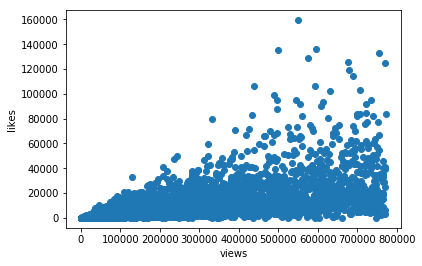

In [0]:
plt.scatter(lower_vals[['views']], lower_vals[['likes']])
plt.xlabel("views")
plt.ylabel("likes")
plt.show()

In [0]:
lm_lower = linear_model.LinearRegression()
model_lower = lm_lower.fit(lower_vals[['views']], lower_vals[['likes']])
lm_lower.score(lower_vals[['views']], lower_vals[['likes']]) # współczynnik determinacji

0.3925046974725276

In [0]:
likes_predict_lower = model_lower.predict # linear regression
likes_predict_lower(lower_vals[['views']])

array([[31441.6682837 ],
       [14314.22108906],
       [ 4846.58575732],
       ...,
       [25483.8395818 ],
       [22640.31121568],
       [12332.96999121]])

Text(0.5, 1.0, 'likes[views] for lower vals')

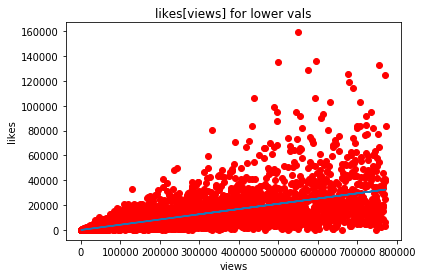

In [0]:
plt.scatter(lower_vals[['views']], lower_vals[['likes']], color = "red")
plt.plot(lower_vals[['views']], likes_predict_lower(lower_vals[['views']]))
plt.xlabel("views")
plt.ylabel("likes") 
plt.title('likes[views] for lower vals')

# Analiza i  Regresja tylko dla odtworzeń >= średnia

In [0]:
higher_vals = cleared[cleared.views >= cleared["views"].mean()]

In [0]:
higher_vals.describe()

,views,likes,dislikes,comment_count
count,1.593000e+03,1.593000e+03,1593.000000,1593.000000
mean,2.435749e+06,1.108989e+05,4715.157564,14552.417451
std,3.451154e+06,2.142439e+05,23734.286679,41099.567108
min,7.733340e+05,0.000000e+00,0.000000,0.000000
25%,1.001371e+06,2.462500e+04,730.000000,2520.000000
50%,1.469703e+06,5.203200e+04,1416.000000,5746.000000
75%,2.457390e+06,1.146610e+05,3064.000000,12368.000000
max,4.843165e+07,3.880071e+06,629120.000000,733373.000000


Z kolei dla filmików bardziej popularnych niż średnia, średnia ilość odtworzeń jest minimalnie mniejsz niż kwantyl górny, podobnie jak i średnia ilość lajków.
Średnia ilość dislajków i komentarzy jest większa niż ich kwantyl górny

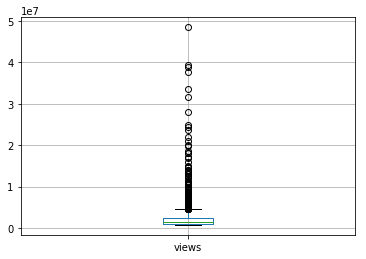

In [0]:
higher_vals.boxplot(column="views")

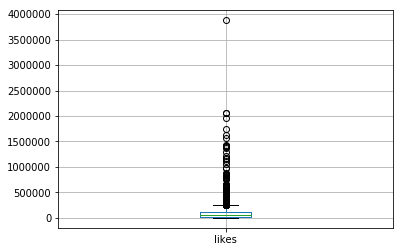

In [0]:
higher_vals.boxplot(column="likes")

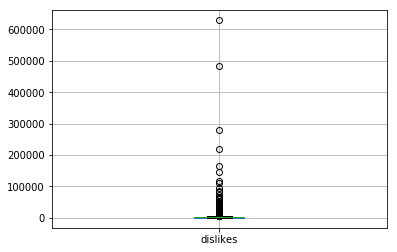

In [0]:
higher_vals.boxplot(column="dislikes")

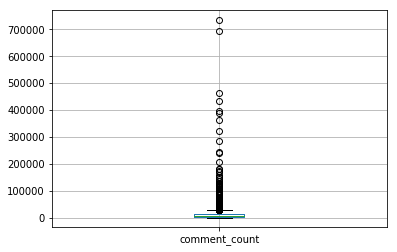

In [0]:
higher_vals.boxplot(column="comment_count")

In [0]:
higher_vals.shape

(1593, 16)

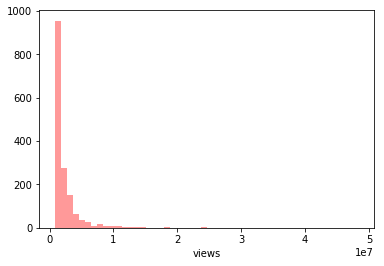

In [0]:
fig, ax = plt.subplots()
_ = sns.distplot(higher_vals["views"], ax = ax, kde = False, color = "red")

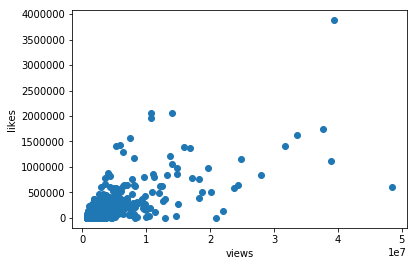

In [0]:
plt.scatter(higher_vals[['views']], higher_vals[['likes']])
plt.xlabel("views")
plt.ylabel("likes")
plt.show()

In [0]:
lm_higher = linear_model.LinearRegression()
model_higher = lm_higher.fit(higher_vals[['views']], higher_vals[['likes']])
lm_higher.score(higher_vals[['views']], higher_vals[['likes']]) # współczynnik determinacji

0.4925430250666701

In [0]:
lm_higher.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [0]:
likes_predict_higher = model_higher.predict # linear regression
likes_predict_higher(higher_vals[['views']])

array([[110159.74157257],
       [143822.49122476],
       [ 96085.05765882],
       ...,
       [ 98139.71787876],
       [ 40191.8952012 ],
       [ 42429.40972443]])

Text(0.5, 1.0, 'likes[views] for higher vals')

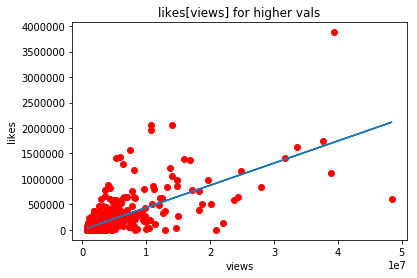

In [0]:
plt.scatter(higher_vals[['views']], higher_vals[['likes']], color = "red")
plt.plot(higher_vals[['views']], likes_predict_higher(higher_vals[['views']]))
plt.xlabel("views")
plt.ylabel("likes") 
plt.title('likes[views] for higher vals')

# Probabilities and chi analyzis

Funkcja zliczająca średnią ilość kliknięć Like dla wybranego DataFame

In [0]:
def get_like_propability(dataframe):
    views = dataframe['views']
    likes = dataframe['likes']

    zipped = zip(views,likes)

    like_propabilities = []
    for i in zipped:
        like_propabilities.append(i[1] / i[0] )

    average_like_propability = sum(like_propabilities) / len(like_propabilities)

    return average_like_propability

Funkcja zliczająca średnią ilość kliknięć Dislike dla wybranego DataFame

In [0]:
def get_dislike_propability(dataframe):
    views = dataframe['views']
    dislikes = dataframe['dislikes']

    zipped = zip(views, dislikes)

    dislike_propabilities = []
    for i in zipped:
        dislike_propabilities.append(i[1] / i[0] )


    average_dislike_propability = sum(dislike_propabilities) / len(dislike_propabilities)
    return average_dislike_propability


Funkcja zliczająca średnią ilość komentarzy dla wybranego DataFame

In [0]:
def get_comment_propability(dataframe):
    views = dataframe['views']
    comments = dataframe['comment_count']

    zipped = zip(views, comments)

    comment_propabilities = []
    for i in zipped:
        comment_propabilities.append(i[1] / i[0] )

    average_comment_propability = sum(comment_propabilities) / len(comment_propabilities)
    return average_comment_propability

Funkcja wypisująca wszystkie możliwe prawodpodobieństwa dla danej kategorii

In [0]:
def print_all_propabilities(dataframe, category):
    if (type(category) != str ):
        raise(Exception("Given category name is not string"))
    print(category + ":")
    print("Like probability:", end = "\t")
    print(get_like_propability(dataframe))
    print("Dislike probability:", end = "\t")
    print(get_dislike_propability(dataframe))
    print("Comment probability:", end = "\t")
    print(get_comment_propability(dataframe))
    print("\n")

Wypisanie wszystkich prawdopodobieństw dla wszystkich filmików

In [0]:
print_all_propabilities(cleared, "All")

grouped_by_category = cleared.groupby('category_id')

All:
Like probability:	0.04008573498768022
Dislike probability:	0.0017176409051281802
Comment probability:	0.005610980414914208




Wypisanie wszystkich prawdopodobieństw dla każdej kategorii osobno

In [0]:
like_propabilities = []
dislike_propabilities = []
comment_propabilities = []

In [0]:

def print_all_propabilities_all_categories(dataframe):
    global like_propabilities
    global dislike_propabilities
    global comment_propabilities

    grouped_by_category = dataframe.groupby('category_id')

    keys = []
    for key, _ in grouped_by_category:
        keys.append(key)

    like_propabilities = []
    dislike_propabilities = []
    comment_propabilities = []


    for key in keys:
        bool_category_table = dataframe['category_id'] == key
        category_dataframe = dataframe[bool_category_table]

        like_propabilities.append(get_like_propability(category_dataframe))
        dislike_propabilities.append(get_dislike_propability(category_dataframe))
        comment_propabilities.append(get_comment_propability(category_dataframe))

        print_all_propabilities(category_dataframe, key)

Wypisanie wszystkich prawdopodobieństw dla każdej kategorii

In [0]:
print_all_propabilities_all_categories(cleared)

Autos & Vehicles:
Like probability:	0.017855856411111804
Dislike probability:	0.0009764972165759346
Comment probability:	0.003564466976982662


Comedy:
Like probability:	0.04965295503376354
Dislike probability:	0.0014130706545664353
Comment probability:	0.005765394608319075


Education:
Like probability:	0.04162769677809599
Dislike probability:	0.0012995913366435634
Comment probability:	0.0053735472774983275


Entertainment:
Like probability:	0.03198048080664675
Dislike probability:	0.0016619458344495667
Comment probability:	0.004698136999201604


Film & Animation:
Like probability:	0.0339219768795319
Dislike probability:	0.0015084511724707582
Comment probability:	0.004805151346573241


Gaming:
Like probability:	0.043621415957708604
Dislike probability:	0.0019291661049829281
Comment probability:	0.009005803040502447


Howto & Style:
Like probability:	0.05131032897859301
Dislike probability:	0.0013101399776570453
Comment probability:	0.006968298621107184


Music:
Like probability:	0.072

Analiza Chi-square

In [0]:
print("Chi analysis:")

all_videos_like_propability = get_like_propability(cleared)
all_videos_dislike_propability = get_dislike_propability(cleared)
all_videos_comment_propability = get_comment_propability(cleared)

all_videos_like_propability = [all_videos_like_propability] * len(like_propabilities)
all_videos_dislike_propability = [all_videos_dislike_propability] * len(dislike_propabilities)
all_videos_comment_propability = [all_videos_comment_propability] * len(comment_propabilities)

phi_likes = scp.chisquare(like_propabilities,f_exp = all_videos_like_propability)
phi_dislikes = scp.chisquare(dislike_propabilities,f_exp = all_videos_dislike_propability)
phi_comments = scp.chisquare(comment_propabilities,f_exp = all_videos_comment_propability)

print(phi_likes)
print(phi_dislikes)
print(phi_comments)

Chi analysis:
Power_divergenceResult(statistic=0.0896541780635618, pvalue=0.9999999999999947)
Power_divergenceResult(statistic=0.005741210805259146, pvalue=1.0)
Power_divergenceResult(statistic=0.006416766785149404, pvalue=1.0)


Analiza chi wykazuje brak zależności prawdopodobieństwa kliknięcia lajków, dislajków i dodawania komentarzy od kategorii

Wypisanie wszystkich prawdopodobieństw dla wyłączonych komentarzach i porównanie z przypadkiem ogólnym( wszystkie filmiki )

In [0]:
print_all_propabilities(cleared,'All')
bool_comments_disabled_table = cleared['comments_disabled']
comments_disabled = cleared[bool_comments_disabled_table]
print_all_propabilities(comments_disabled,'comments_disabled')

All:
Like probability:	0.04008573498768022
Dislike probability:	0.0017176409051281802
Comment probability:	0.005610980414914208


comments_disabled:
Like probability:	0.012805255167537099
Dislike probability:	0.003113634317776765
Comment probability:	0.0




Filmiki z wyłączonymi komentarzami cechują się o wiele większym prawdopodobieństwem tego że odwiedzająca osoba kliknie dislajk i dużo mniejszym że kliknie lajk

Wypisanie wszystkich prawdopodobieństw dla wszystkich kategorii przy wyłączonych komentarzach

In [0]:
print_all_propabilities(comments_disabled, 'All')

All:
Like probability:	0.012805255167537099
Dislike probability:	0.003113634317776765
Comment probability:	0.0




ogólne prawdopodobieństwo dislika rośnie przy wyłączonych komentarzach z ok 0.0017 do 0.0031
prawdopodobieństwo lajka maleje z 0.040 do 0.018

In [0]:
print_all_propabilities_all_categories(comments_disabled)

Autos & Vehicles:
Like probability:	0.0033406509496993414
Dislike probability:	0.0013362603798797365
Comment probability:	0.0


Comedy:
Like probability:	0.0020168067226890756
Dislike probability:	0.01310924369747899
Comment probability:	0.0


Education:
Like probability:	0.0004344048653344917
Dislike probability:	0.0
Comment probability:	0.0


Entertainment:
Like probability:	0.020365586366536514
Dislike probability:	0.001088578430700642
Comment probability:	0.0


Film & Animation:
Like probability:	0.0028140732881021236
Dislike probability:	0.0015994634727253885
Comment probability:	0.0


Gaming:
Like probability:	0.037175265196353224
Dislike probability:	0.0055422504282380885
Comment probability:	0.0


Howto & Style:
Like probability:	0.0
Dislike probability:	0.0
Comment probability:	0.0


Music:
Like probability:	0.007057737921692212
Dislike probability:	0.0004628758938679144
Comment probability:	0.0


News & Politics:
Like probability:	0.008849676627749497
Dislike probability:	0.0

Najczęściej lubiana kategoria: Music
Najmniej lubiana: News and Politics
Najbardziej nielubiana: News and Politics
Najmniej nielubiana: Pets & Animals

Wypisanie wszystkich prawdopodobieństw dla wyłączonym ocenianiu i porównanie z przypadkiem ogólnym( wszystkie filmiki )

In [0]:
print_all_propabilities(cleared, 'All')
bool_rating_disabled_table = cleared['ratings_disabled']
rating_disabled = cleared[bool_rating_disabled_table]
print_all_propabilities(rating_disabled, 'rating_disabled')


All:
Like propability:	0.04008573498768022
Dislike propability:	0.0017176409051281802
Comment propability:	0.005610980414914208


rating_disabled:
Like propability:	0.0
Dislike propability:	0.0
Comment propability:	0.002004482437898499




Wypisanie wszystkich prawdopodobieństw dla każdej kategorii przy wyłączonym ocenianiu

In [0]:
print_all_propabilities_all_categories(rating_disabled)

Education:
Like probability:	0.0
Dislike probability:	0.0
Comment probability:	0.000415401929232818


Entertainment:
Like probability:	0.0
Dislike probability:	0.0
Comment probability:	0.0002555652913761794


Film & Animation:
Like probability:	0.0
Dislike probability:	0.0
Comment probability:	0.0004195755311060733


Howto & Style:
Like probability:	0.0
Dislike probability:	0.0
Comment probability:	0.0


Music:
Like probability:	0.0
Dislike probability:	0.0
Comment probability:	0.001230938672761469


News & Politics:
Like probability:	0.0
Dislike probability:	0.0
Comment probability:	0.0


Nonprofits & Activism:
Like probability:	0.0
Dislike probability:	0.0
Comment probability:	0.0


People & Blogs:
Like probability:	0.0
Dislike probability:	0.0
Comment probability:	0.011757454107100825


Science & Technology:
Like probability:	0.0
Dislike probability:	0.0
Comment probability:	0.0010286198342106855


Sports:
Like probability:	0.0
Dislike probability:	0.0
Comment probability:	0.0002296

# Najpopularniejsze kanały





najpopularniejsze pod względem wyświetleń

In [0]:
channels = cleared.groupby("channel_title").sum()

In [0]:
channels.head()

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
channel_title,,,,,,,
12 News,85643,170,45,0,0.0,0.0,0.0
1MILLION Dance Studio,1733477,122066,1276,8527,0.0,0.0,0.0
1theK (원더케이),7035666,702920,8435,49777,0.0,0.0,0.0
20th Century Fox,48572239,1204019,21395,78337,0.0,0.0,0.0
2CELLOS,205869,11198,120,446,0.0,0.0,0.0


In [0]:
channels_sorted = channels.sort_values("views", ascending = False)

In [0]:
channels_sorted.head(50)

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
channel_title,,,,,,,
Dude Perfect,108024253,4447335,86018,319353,0.0,0.0,0.0
ibighit,103235984,16434967,153241,2420258,0.0,0.0,0.0
jypentertainment,87356902,3657159,195893,587408,0.0,0.0,0.0
Marvel Entertainment,80171420,3731846,41194,455700,0.0,0.0,0.0
TheEllenShow,71542914,1821187,41753,106142,4.0,0.0,0.0
Jimmy Kimmel Live,63270493,1215868,68477,118705,1.0,0.0,0.0
WWE,60802364,1103822,60036,143783,1.0,0.0,0.0
MalumaVEVO,60445923,1106425,85784,59955,0.0,0.0,0.0
Ed Sheeran,54453856,3468220,46087,183023,0.0,0.0,0.0


najpopularniejsze pod względem ilości filmików w "trending"

In [0]:
channels_videos_amount = cleared.groupby("channel_title").size()

In [0]:
channels_videos_amount.head()

channel_title
12 News                   1
1MILLION Dance Studio     4
1theK (원더케이)              5
20th Century Fox         17
2CELLOS                   1
dtype: int64

In [0]:
channels_videos_amount.sort_values(ascending = False).head(50)

channel_title
ESPN                                       84
TheEllenShow                               74
The Tonight Show Starring Jimmy Fallon     72
Jimmy Kimmel Live                          70
The Late Show with Stephen Colbert         58
Netflix                                    58
NBA                                        54
CNN                                        52
Vox                                        48
The Late Late Show with James Corden       46
Refinery29                                 41
BuzzFeedVideo                              40
INSIDER                                    39
Late Night with Seth Meyers                37
NFL                                        36
Saturday Night Live                        35
WWE                                        34
First We Feast                             31
WIRED                                      29
Tasty                                      28
Washington Post                            27
Great Big Story     

Który kanał ma najwięcej lajków?

In [0]:
channels_sorted_likes = channels.sort_values("likes", ascending = False)
channels_sorted_likes.head(50)

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
channel_title,,,,,,,
ibighit,103235984,16434967,153241,2420258,0.0,0.0,0.0
Dude Perfect,108024253,4447335,86018,319353,0.0,0.0,0.0
SMTOWN,32764003,4303591,53763,482029,0.0,0.0,0.0
Logan Paul Vlogs,42794469,3972175,1143913,1664199,0.0,0.0,0.0
Marvel Entertainment,80171420,3731846,41194,455700,0.0,0.0,0.0
jypentertainment,87356902,3657159,195893,587408,0.0,0.0,0.0
Ed Sheeran,54453856,3468220,46087,183023,0.0,0.0,0.0
Safiya Nygaard,49031717,2644275,30820,508544,0.0,0.0,0.0
TaylorSwiftVEVO,32408000,2392627,101030,215413,0.0,0.0,0.0


# Najczęściej używane słowa w kategoriach

Inicjalizacja słownika przechowującego wystąpienia słów

In [0]:
word_occurances = {}

Funkcja wstawiająca słowo do słownika, jeśli dane słowo występuje w słowniku, to inkrementuje licznik wystąpień o 1. W przeciwnym przypadku wstawia do słownika, za bazową wartością licznika 1. 

In [0]:
def insert_to_word_occurances(word):
    global word_occurances
    if ( type(word) != str):
        return
    if ( word not in word_occurances.keys() ):
        word_occurances.update({word : 1})
    else:
        word_occurances[word] += 1

Funkcja wyliczająca wystąpienia słów w kolumnie description w podanym dataset

In [0]:
def print_word_occurances_in_dataset(dataset):
    global word_occurances
    word_occurances = {}

    for not_splitted_yet in dataset['description']:

        try:
            words = not_splitted_yet.split()
        except(AttributeError):
            words = []
        for word in words:
            insert_to_word_occurances(word)

    word_occurances = sorted(word_occurances.items(), key = lambda kv : kv[1] )

    print("\n50 least commonly used words")
    for i in range(0,50):
        print(word_occurances[i])
    word_occurances = word_occurances[-1::-1]
    print("\n50 most commonly used words")
    for i in range(0,50):
        print(word_occurances[i])
    print()

Funkcja wypisująca wszystkie wystąpienia słów w podanym datasecie , grupując po kluczach kolumny description

In [0]:
def print_word_occurances_by_collumn_in_dataset(dataframe):
    grouped_by_category = dataframe.groupby('category_id')

    keys = []
    for key, _ in grouped_by_category:
        keys.append(key)


    for key in keys:
        bool_category_table = dataframe['category_id'] == key
        category_dataframe = dataframe[bool_category_table]
        print()
        print(key)
        print_word_occurances_in_dataset(category_dataframe)
        print()

Wypisanie wszystkich wystąpień słów we wszystkich opisach

In [0]:
print_word_occurances_in_dataset(cleared)


50 least commonly used words
("SHANTELL'S", 1)
('https://www.youtube.com/shantellmartin\\nCANDICE', 1)
('https://www.lovebilly.com\\n\\nfilmed', 1)
('https://twitter.com/CaseyNeistat\\n\\namazing', 1)
('https://soundcloud.com/discoteeth\\n\\nad', 1)
('disclosure.', 1)
('AD.', 1)
("'GALAXY", 1)
("PROJECT'", 1)
('clear.', 1)
('specifics.', 1)
('election,', 1)
('catheter', 1)
("hasn't.\\n\\nConnect", 1)
('http://youtube.com/c/rudymancuso\\nLele', 1)
('http://youtube.com/c/lelepons\\nKing', 1)
('https://youtube.com/user/BachelorsPadTv\\n\\nVideo', 1)
('Effects:', 1)
('\\nCaleb', 1)
('Natale', 1)
('https://instagram.com/calebnatale\\n\\nPA:\\nPaulina', 1)
('Gregory\\n\\n\\nShots', 1)
('http://youtube.com/c/shots\\n\\n#Rudy\\n#RudyMancuso', 1)
('devotee.', 1)
("#1218\\nDon't", 1)
('https://goo.gl/xeZNQt\\nWatch', 1)
('https://youtu.be/MhCdiiB8CQg', 1)
('https://youtu.be/7qiOrNao9fg\\nWatch', 1)
('http://bit.ly/GMM1218\\n\\nPick', 1)
('yet!\\nLeave', 1)
('\\n\\nOrder', 1)
('thoughts!\\nAll',

Wypisanie wystąpień wszystkich słów po kolumnach

In [0]:
print_word_occurances_by_collumn_in_dataset(cleared)


Autos & Vehicles

50 least commonly used words
('Finally', 1)
('Miura', 1)
('Carmax!', 1)
('Hope', 1)
('enjoyed!\\nMake', 1)
('@Hp_overload', 1)
('10,', 1)
('Ha', 1)
('Noi,', 1)
('Vietnam\\n\\nWhen', 1)
('walking', 1)
('dog', 1)
('street,', 1)
('train', 1)
('parked', 1)
('trail.', 1)
('However,', 1)
('pavement', 1)
('opposite', 1)
('trail', 1)
('hearing', 1)
('horn', 1)
('train.', 1)
('result,', 1)
('destroyed', 1)
('train.\\n\\n\\nTO', 1)
('Olympic', 1)
('Hoy', 1)
('stranger', 1)
('record-breaking', 1)
('achievements', 1)
('wheels,', 1)
('now', 1)
('Scot', 1)
('lay', 1)
('claim', 1)
('record', 1)
('four', 1)
('wheels.', 1)
('Joining', 1)
('celebrate', 1)
('60', 1)
('Seven,', 1)
('‘60', 1)
('Challenge’', 1)
('Donington', 1)
('Park.', 1)
('completed.\\n\\nTo', 1)
('visit:', 1)
('https://tinyurl.com/ybvgpbfq', 1)

50 most commonly used words
('the', 284)
('and', 165)
('to', 153)
('a', 119)
('of', 107)
('on', 97)
('in', 81)
('is', 73)
('for', 63)
('with', 47)
('-', 45)
('The', 45)
('you'

Ogólnie dominują najczęściej występujące słowa w języku angielskim, szczególnie słowo "The"
Dodatkowo dla poszczególnych kategorii często pojawiają się np. tytuły programmów i nazwika np. "Jimmy" w "Comedy" od słynnego late night show Jimmiego Kimmela

# Tagi

Inicjalizacja słownika przechowującego informacje dla poszczególnych tagów

In [0]:
tag_views = {}

Funkcja wstawiająca nazwę taga oraz ilość pewnej cechy taga do powyższego słownika

In [0]:
def insert_to_tag_view(key,val):
    global tag_views
    if ( type(key) != str):
        return
    if ( key not in tag_views.keys() ):
        tag_views.update({key : val})
    else:
        tag_views[key] += val

In [0]:
tag_views = {}
all_tags = cleared['tags']
first = cleared['views']
for j in range(0,len(all_tags)):
    try:
      tags = all_tags[j].split("|\"")
    except(Exception):
      continue
    for i in range(1,len(tags)):
        tags[i] = tags[i][:-1]
    for i in range(0,len(tags)):
        try:
          insert_to_tag_view(tags[i], first[j])
        except(Exception):
          print(j)

In [0]:
print(tag_views)

{'SHANtell martin': 748374, 'last week tonight trump presidency': 2418783, 'last week tonight donald trump': 2418783, 'john oliver trump': 2418783, 'donald trump': 4745942, 'racist superman': 6204934, 'rudy': 10959539, 'mancuso': 10959539, 'king': 3611322, 'bach': 3191434, 'racist': 3191434, 'superman': 4248999, 'love': 7501305, 'rudy mancuso poo bear black white official music video': 3962469, 'iphone x by pineapple': 3191434, 'lelepons': 38943570, 'hannahstocking': 27840245, 'rudymancuso': 27840245, 'inanna': 25719204, 'anwar': 27840245, 'sarkis': 25719204, 'shots': 27840245, 'shotsstudios': 27840245, 'alesso': 27840245, 'anitta': 24629388, 'brazil': 24372329, "Getting My Driver's License | Lele Pons": 3191434, 'rhett and link': 1456525, 'gmm': 1456525, 'good mythical morning': 1456525, 'rhett and link good mythical morning': 1456525, 'good mythical morning rhett and link': 1456525, 'mythical morning': 1456525, 'Season 12': 1456525, 'nickelback lyrics': 343168, 'nickelback lyrics rea

Funkcja przygotowująca słownik tag_views dla danej kolumny

In [0]:
def get_tag_counts(dataframe, collumn):
    global tag_views
    tag_views = {}
    all_tags = dataframe['tags']
    first = dataframe[collumn]
    for j in range(0,len(all_tags)):
      try:
        tags = all_tags[j].split("|\"")
      except(Exception):
        continue
      for i in range(1,len(tags)):
        tags[i] = tags[i][:-1]
      for i in range(0,len(tags)):
        try:
          insert_to_tag_view(tags[i], first[i])
        except(Exception):
          continue
    return tag_views

In [0]:
print(get_tag_counts(cleared, 'views'))

{'SHANtell martin': 748374, 'last week tonight trump presidency': 748374, 'last week tonight donald trump': 2418783, 'john oliver trump': 3191434, 'donald trump': 6231184, 'racist superman': 1798191, 'rudy': 10018300, 'mancuso': 14861467, 'king': 729097, 'bach': 2095731, 'racist': 119180, 'superman': 3326562, 'love': 26389566, 'rudy mancuso poo bear black white official music video': 1643791, 'iphone x by pineapple': 256426, 'lelepons': 4857748, 'hannahstocking': 3932791, 'rudymancuso': 5374570, 'inanna': 6301969, 'anwar': 7246598, 'sarkis': 5626821, 'shots': 2592570, 'shotsstudios': 2394522, 'alesso': 6018975, 'anitta': 4549893, 'brazil': 1950331, "Getting My Driver's License | Lele Pons": 224019, 'rhett and link': 2993496, 'gmm': 9675132, 'good mythical morning': 12765736, 'rhett and link good mythical morning': 1372672, 'good mythical morning rhett and link': 8382924, 'mythical morning': 476720, 'Season 12': 5842298, 'nickelback lyrics': 817732, 'nickelback lyrics real or fake': 826

Funkcja wypisująca rezultat wywołania powyższej funkcji ( top 50 )

In [0]:
def print_tag_counts(dataframe, collumn):
    view = get_tag_counts(dataframe, collumn)
    view = sorted(view.items(), key = lambda kv : kv[1])
    view = view[-1::-1]
    print()
    for i in range(0,50):
        print(str(view[i][0]) + ":\t" + str(view[i][1]))
    print()

Funkcja wypisuja średnie stosunki wartości pierwszej i drugiej kolumny

In [0]:
def get_tag_probabilities(dataframe, collumn_upper, collumn_lower):
    global tag_views
    tag_views = {}
    all_tags = dataframe['tags']
    upper = dataframe[collumn_upper]
    lower = dataframe[collumn_lower]
    for i in range(0, len(all_tags)):
        try:
          tags = all_tags[i].split("|\"")
        except(Exception):
          continue
        for i in range(1, len(tags)):
            tags[i] = tags[i][:-1]
        for i in range(0, len(tags)):
            try:
              insert_to_tag_view(tags[i], [ upper[i] / lower[i] ])
            except:
              continue

    for key, val in tag_views.items():
        tag_views[key] = sum(val) / len(val)
    return tag_views

Funkjca wypisująca rezultat wywołania powyższej funkcji

In [0]:
def print_tag_probabilities(dataframe, collumn_upper, collumn_lower):
    view = get_tag_probabilities(dataframe, collumn_upper, collumn_lower)
    view = sorted(view.items(), key = lambda kv : kv[1])
    view = view[-1::-1]
    print()
    for i in range(0,50):
        print(str(view[i][0]) + ":\t" + str(view[i][1]))
    print()

Wyświetlenie top 50 wyświetlań dla tagów

In [0]:
print_tag_counts(cleared, 'views')


funny:	168212299
comedy:	122727900
Colbert:	89360152
news:	72765935
Pop:	64332181
talk show:	59565260
Comedy:	56351459
music:	53974578
live:	52987668
explain:	51319370
basketball:	50439569
[none]:	49392684
r29:	47871510
television:	46577101
beauty:	44948169
pop:	44526841
interview:	42222591
Jimmy Fallon:	41867685
christmas:	40780639
video:	40507586
comedian:	40137211
Trailer:	39681432
lol:	39248170
official:	39168075
celebrities:	38959152
highlights:	38724200
vox:	38700528
Stephen Colbert:	38174704
show:	37000356
improv:	36688134
NBC:	36518229
refinery 29:	36281745
trailer:	36090658
offense:	35362200
liza:	35146813
The Late Late Show:	35002240
movie:	34948281
makeup routine:	34742328
Sausage Party:	34317062
basejump:	34317062
Hairspray:	34317062
The Voice:	34317062
season 8:	34317062
politics:	34287971
Football:	33815540
2017:	32780651
sketch:	32034672
cooking:	31580544
entertainment:	31177041
celebrity:	30892172



Wyświetlenie top 50 likes dla tagów

In [0]:
print_tag_counts(cleared, 'likes')


funny:	5919911
comedy:	5109900
Colbert:	4088924
[none]:	3796782
Pop:	2938698
news:	2909076
live:	2715013
explain:	2349182
celebrities:	2333659
television:	2297763
music:	2295028
beauty:	2288034
r29:	2190495
basketball:	2163640
pop:	2162295
talk show:	2155829
video:	2065454
interview:	2002275
late night show:	1851290
lol:	1807688
celebrity:	1782163
technology:	1777043
2017:	1733003
politics:	1711957
Jimmy Fallon:	1709672
official:	1658771
improv:	1653121
liza:	1633020
Trailer:	1630337
offense:	1619017
humor:	1618249
Stephen Colbert:	1608886
karaoke:	1608530
sports:	1604645
letterman:	1604030
makeup routine:	1603307
Sausage Party:	1574838
basejump:	1574838
Hairspray:	1574838
The Voice:	1574838
season 8:	1574838
christmas:	1562544
vox:	1554960
sketch:	1525400
night:	1499845
refinery 29:	1457775
afc:	1456161
wrestling:	1428485
Comedy:	1423969
family:	1383881



Wyświetlenie top 50 dislike dla tagów

In [0]:
print_tag_counts(cleared, 'dislikes')


funny:	256868
comedy:	214220
[none]:	195756
Colbert:	149492
news:	117797
Jimmy Fallon:	107448
Pop:	107114
basketball:	100742
pop:	100019
Stephen Colbert:	99496
vox:	98336
music:	93897
lol:	93219
Comedy:	92541
refinery 29:	92190
Trailer:	90673
improv:	89872
liza:	89831
beauty:	88866
makeup routine:	87346
Sausage Party:	86840
basejump:	86840
Hairspray:	86840
The Voice:	86840
season 8:	86840
explain:	86787
The Late Late Show:	86394
live:	84931
r29:	80085
Football:	78403
talk show:	77478
highlights:	76973
interview:	76959
love:	71553
politics:	71239
official:	70138
kimmel:	67606
recipe:	67012
Seth Meyers:	66799
trump:	66461
2017:	66444
comedian:	66372
The Last Jedi:	66317
vlog:	65423
News:	65201
entertainment:	63408
Christmas:	63018
technology:	62650
family:	62537
christmas:	61821



Wyświetlenie top 50 komentarzy dla tagów

In [0]:
print_tag_counts(cleared, 'comment_count')


[none]:	1052964
funny:	762304
comedy:	500588
pop:	320213
celebrities:	312953
music:	310731
beauty:	302634
video:	294512
jimmy:	287172
lol:	286063
The Tonight Show:	279399
2017:	272153
television:	268003
liza:	267895
Pop:	266842
improv:	262401
makeup routine:	257441
vox.com:	255264
nba:	254133
news:	252210
Sausage Party:	251764
basejump:	251764
Hairspray:	251764
The Voice:	251764
season 8:	251764
late night show:	245252
James Corden:	243634
Netflix:	240272
refinery29:	239310
live:	233585
Jimmy Fallon:	231905
celebrity:	231448
talk show:	231095
Colbert:	229068
Trailer:	228054
The Late Show:	223356
christmas:	218534
technology:	218260
how to:	217455
Stephen Colbert:	213941
basketball:	211973
politics:	211616
night:	205673
family:	205022
comedian:	203320
vox:	203248
highlights:	201621
Comedy:	201074
afc:	193977
refinery 29:	190545



Wyświetlenie top 50 prawdopodobieństwa wciśnięcia przycisku like przez odwiedzającego dla tagu

In [0]:
print_tag_probabilities(cleared,'likes','views')


star wars: battlefront 2:	0.16607182852372518
icecream:	0.16607182852372518
social experiements:	0.16607182852372518
stage:	0.16607182852372518
HOT97.com:	0.16607182852372518
max:	0.16607182852372518
米:	0.16607182852372518
doug jones alabama:	0.16607182852372518
serious eats:	0.16607182852372518
2017 rap songs:	0.16607182852372518
micd:	0.16607182852372518
care:	0.16607182852372518
ryan williams 2017:	0.16607182852372518
Sphero:	0.16607182852372518
dreamworks:	0.16607182852372518
volleyball:	0.16607182852372518
simplynailogical tea:	0.16607182852372518
makeover challenge:	0.16607182852372518
justice smith:	0.16607182852372518
puppy rescue video:	0.16607182852372518
rhett link mcdonald's:	0.16607182852372518
whose dog is it:	0.16607182852372518
fcc vote:	0.16607182852372518
tana mongeau:	0.16607182852372518
pump:	0.16607182852372518
author:	0.16607182852372518
Scallon:	0.16607182852372518
Jared Haibon:	0.16607182852372518
cf grwm:	0.16607182852372518
Drone Loudness:	0.16607182852372518

Wyświetlenie top 50 prawdopodobieństwa wciśnięcia przycisku dislike przez odwiedzającego dla tagu

In [0]:
print_tag_probabilities(cleared,'dislikes','views')


207:	0.04705022386014071
amiibo:	0.04705022386014071
sp:ti:home=Mia:	0.04705022386014071
floor is lava:	0.04705022386014071
file:	0.04705022386014071
how to get a six pack:	0.04705022386014071
motoring:	0.04705022386014071
chewbacca:	0.04705022386014071
lauder:	0.04705022386014071
making beats:	0.04705022386014071
sp:dt=2017-11-27T20:30:00-05:00:	0.04705022386014071
toadstool:	0.04705022386014071
switzerland:	0.04705022386014071
source:	0.04705022386014071
sp:ti:away=GB:	0.04705022386014071
s’awesome sauce:	0.04705022386014071
super powers:	0.04705022386014071
darkwa:	0.04705022386014071
riding:	0.04705022386014071
Cat Birthday:	0.04705022386014071
youtuber facts:	0.04705022386014071
sp:dt=2017-11-12T16:25:00-05:00:	0.026170614575573
living:	0.025864546140855343
sp:ti:away=Phi:	0.02566892800659326
Look What You Made Me Do:	0.0249332177216707
dez:	0.024387366726362658
pack:	0.023864663977633267
school of life:	0.023779123453519957
sp:ti:away=OhioSt:	0.019006699190905325
indie:	0.016316

Wyświetlenie top 50 prawdopodobieństwa napisania komentarza przez odwiedzającego dla tagu


In [0]:
print_tag_probabilities(cleared,'comment_count','views')


michelle khare star wars:	0.02418149942568939
scandinavia:	0.02418149942568939
sundance film festival:	0.02418149942568939
john cena minecraft:	0.02418149942568939
after:	0.02418149942568939
top predator:	0.02418149942568939
otp:	0.02418149942568939
kingsleyyy:	0.02418149942568939
2017 year in review:	0.02418149942568939
turner:	0.02418149942568939
argue:	0.02418149942568939
starbucks:	0.02418149942568939
the vow:	0.02418149942568939
puppy rescue compilation:	0.02418149942568939
dollar menu mcdonalds list:	0.02418149942568939
HX711:	0.02418149942568939
popping:	0.02418149942568939
hourglass:	0.02418149942568939
Devin Graham:	0.02418149942568939
Rom Com:	0.02418149942568939
how to deal with failure:	0.02418149942568939
kaon:	0.02418149942568939
vision boards:	0.02418149942568939
O Come O Come Emmanuel:	0.02418149942568939
boycotting santa:	0.02418149942568939
star wars cast funny:	0.02418149942568939
Action Movies:	0.02418149942568939
pink hair dye:	0.02418149942568939
sporcle:	0.02418